In [ ]:
!git clone https://git@github.com/NadaAdelMousa/Dry-Beans-Classification.git

fatal: destination path 'Dry-Beans-Classification' already exists and is not an empty directory.


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#pd.set_option('display.max_rows', None)

In [ ]:
df=pd.read_csv('/content/Dry-Beans-Classification/train.csv',index_col='ID')
df.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(1

In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [ ]:
df.isna().sum().sum()

0

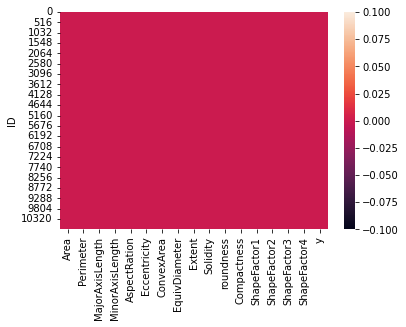

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

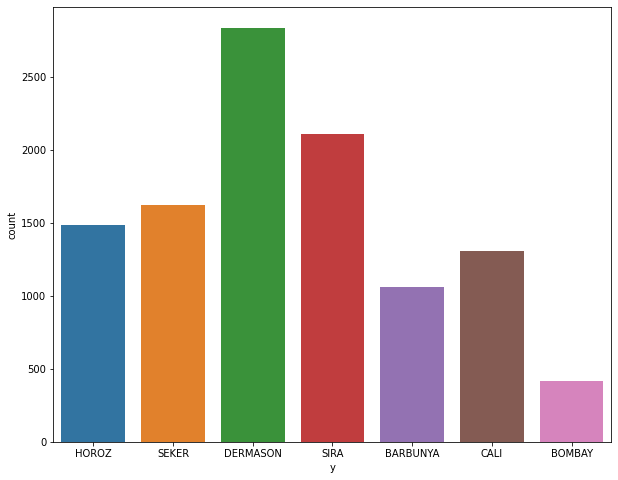

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="y", data=df);

In [ ]:
df.shape

(10834, 17)

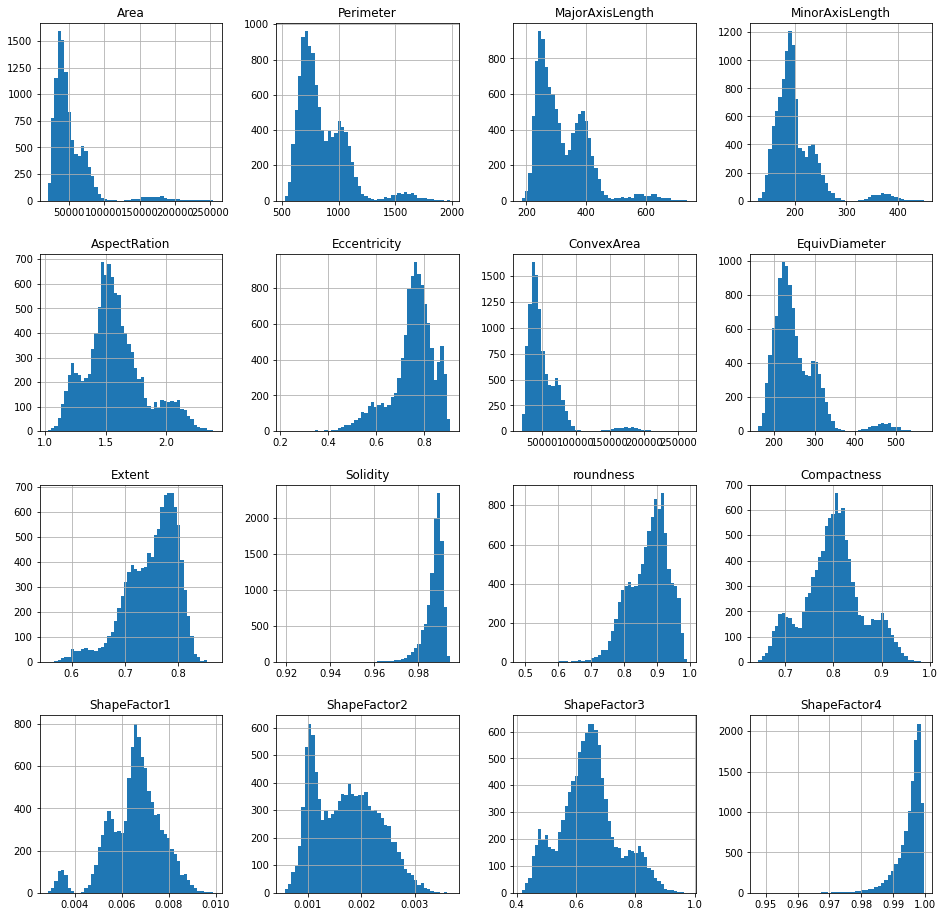

In [ ]:
df.hist(bins=50,figsize=(16,16))
plt.show()

In [ ]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Area               2.970246
Perimeter          1.650773
MajorAxisLength    1.390286
MinorAxisLength    2.251468
AspectRation       0.589186
Eccentricity      -1.075626
ConvexArea         2.960315
EquivDiameter      1.971378
Extent            -0.900892
Solidity          -2.507634
roundness         -0.659566
Compactness        0.038242
ShapeFactor1      -0.544873
ShapeFactor2       0.292677
ShapeFactor3       0.245589
ShapeFactor4      -2.628540
dtype: float64

In [ ]:
# from sklearn.preprocessing import QuantileTransformer
# qt = QuantileTransformer(n_quantiles=100,output_distribution="normal", random_state=0)
# qt.fit_transform(df)

In [ ]:
#less repeated class
BOMBAY_class=len(df[df['y']=='BOMBAY'])
print(BOMBAY_class)

418


In [ ]:
#most repeated class
DERMASON_class=len(df[df['y']=='DERMASON'])
print(DERMASON_class)

2837


In [ ]:
BOMBAY_idx=df[df['y']=='BOMBAY'].index
BOMBAY_idx

Int64Index([   18,    21,    38,    47,    89,   135,   142,   174,   176,
              179,
            ...
            10391, 10405, 10449, 10477, 10508, 10596, 10628, 10726, 10789,
            10790],
           dtype='int64', name='ID', length=418)

In [ ]:
#first major
DERMASON_idx=df[df['y']=='DERMASON'].index
DERMASON_idx

Int64Index([    2,     3,    14,    19,    20,    23,    25,    26,    29,
               30,
            ...
            10775, 10780, 10781, 10788, 10801, 10813, 10814, 10821, 10830,
            10833],
           dtype='int64', name='ID', length=2837)

In [ ]:
random_majority_indices=np.random.choice(DERMASON_idx,len(BOMBAY_idx),replace=False)
under_sample_indices=np.concatenate([BOMBAY_idx,random_majority_indices])

In [ ]:
#second major
SIRA_idx=df[df['y']=='SIRA'].index
random_majority_indices=np.random.choice(SIRA_idx,len(BOMBAY_idx),replace=False)
under_sample_indices=np.concatenate([under_sample_indices,random_majority_indices])

In [ ]:
len(under_sample_indices)

1254

In [ ]:
#third majority class
SEKER_idx=df[df['y']=='SEKER'].index
random_majority_indices=np.random.choice(SEKER_idx,len(BOMBAY_idx),replace=False)
under_sample_indices=np.concatenate([under_sample_indices,random_majority_indices])

In [ ]:
#fourth majority class 
HOROZ_idx=df[df['y']=='HOROZ'].index
random_majority_indices=np.random.choice(HOROZ_idx,len(BOMBAY_idx),replace=False)
under_sample_indices=np.concatenate([under_sample_indices,random_majority_indices])

In [ ]:
#fifth majority class
CALI_idx=df[df['y']=='CALI'].index
random_majority_indices=np.random.choice(CALI_idx,len(BOMBAY_idx),replace=False)
under_sample_indices=np.concatenate([under_sample_indices,random_majority_indices])

In [ ]:
#six majority class
BARBUNYA_idx=df[df['y']=='BARBUNYA'].index
random_majority_indices=np.random.choice(BARBUNYA_idx,len(BOMBAY_idx),replace=False)
under_sample_indices=np.concatenate([under_sample_indices,random_majority_indices])

In [ ]:
data=df.loc[under_sample_indices]
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
18,162230,1486.167,543.407255,381.837178,1.423139,0.711514,163470,454.486140,0.782835,0.992415,0.923009,0.836364,0.003350,0.001011,0.699504,0.995492,BOMBAY
21,203688,1738.084,676.058986,389.116090,1.737422,0.817756,207028,509.257908,0.788071,0.983867,0.847293,0.753274,0.003319,0.000659,0.567422,0.985852,BOMBAY
38,139639,1379.183,473.780598,376.550241,1.258214,0.606901,140541,421.656136,0.783916,0.993582,0.922514,0.889982,0.003393,0.001313,0.792068,0.996590,BOMBAY
47,152063,1455.551,524.784869,371.247487,1.413572,0.706785,153860,440.014346,0.764451,0.988321,0.901942,0.838466,0.003451,0.001052,0.703025,0.993777,BOMBAY
89,197245,1702.646,642.077245,396.085390,1.621058,0.787056,200777,501.138837,0.802083,0.982408,0.855002,0.780496,0.003255,0.000745,0.609174,0.987507,BOMBAY


In [ ]:
data['y'].value_counts()

BOMBAY      418
DERMASON    418
SIRA        418
SEKER       418
HOROZ       418
CALI        418
BARBUNYA    418
Name: y, dtype: int64

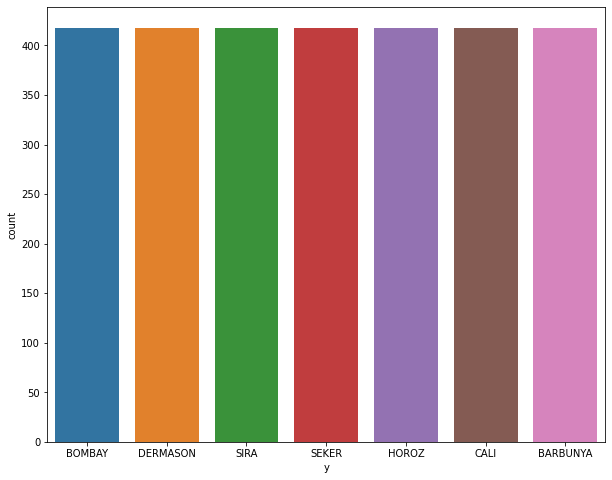

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="y", data=data);

In [ ]:
# from sklearn import preprocessing

# label_encoder = preprocessing.LabelEncoder()
# data['y']= label_encoder.fit_transform(data['y'])
# data['y'].unique()
#y = LabelEncoder().fit_transform(y.astype('str'))

In [ ]:
data.replace(['BOMBAY','DERMASON','SIRA','SEKER', 'HOROZ', 'CALI','BARBUNYA'], [0,1,2,3,4,5,6], inplace=True)

In [ ]:
data['y'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
df.columns.tolist()

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4',
 'y']

In [ ]:
from scipy import stats
# def removeOutliers(df,Columns):
#     z_scores = stats.zscore(df[Columns]) 
#     abs_z_scores = np.abs(z_scores)
#     filtered_entries = (abs_z_scores < 3). all(axis=1)
#     new_df = df[filtered_entries]
#     return new_df
#remove outlier based on each label
y_labels = [0,1,2,3,4,5,6]
featurs=data.columns.tolist()
featurs=featurs[:len(featurs)-1]
def removeOutliers_cat(df_raw,Columns):
    data= df_raw.copy()
    for cat_ in y_labels:
        df_ = data[data['y']==cat_]
        z_scores = stats.zscore(df_[Columns]) 
        abs_z_scores = np.abs(z_scores)
        filtered_entries = (abs_z_scores < 5).all(axis=1)
        df_ = df_[filtered_entries]
        data = data[data['y']!=cat_]
        data = data.append(df_)
    return data

df=removeOutliers_cat(data,featurs)    

In [ ]:
featurs[:len(featurs)-1]

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3']

In [ ]:
df.shape

(2893, 17)

In [ ]:
X=df.drop(['y'],axis=1).copy()
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,,,,,,,,,,,,,,,,
18,162230,1486.167,543.407255,381.837178,1.423139,0.711514,163470,454.486140,0.782835,0.992415,0.923009,0.836364,0.003350,0.001011,0.699504,0.995492
21,203688,1738.084,676.058986,389.116090,1.737422,0.817756,207028,509.257908,0.788071,0.983867,0.847293,0.753274,0.003319,0.000659,0.567422,0.985852
38,139639,1379.183,473.780598,376.550241,1.258214,0.606901,140541,421.656136,0.783916,0.993582,0.922514,0.889982,0.003393,0.001313,0.792068,0.996590
47,152063,1455.551,524.784869,371.247487,1.413572,0.706785,153860,440.014346,0.764451,0.988321,0.901942,0.838466,0.003451,0.001052,0.703025,0.993777
89,197245,1702.646,642.077245,396.085390,1.621058,0.787056,200777,501.138837,0.802083,0.982408,0.855002,0.780496,0.003255,0.000745,0.609174,0.987507


In [ ]:
X.shape

(2893, 16)

In [ ]:
y=df['y'].copy()
y.shape

(2893,)

In [ ]:
y=y.values
y=y.reshape((-1,1))
y.shape

(2893, 1)

In [ ]:
# from sklearn.preprocessing import QuantileTransformer
# rng = np.random.RandomState(0)
# X = np.sort(rng.normal(loc=0.5, scale=0.25, size=(25, 1)), axis=0)
# qt = QuantileTransformer(n_quantiles=10, random_state=0)
# qt.fit_transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaledX =pd.DataFrame(scaler.fit_transform(X),index=df.index)
# # X=pd.DataFrame(X)
# scaledX.head()
# X_scaled= StandardScaler().fit_transform(X.values)
# X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
# X.head()


Scaling_StScalar = StandardScaler().fit(X.values)
X = pd.DataFrame(Scaling_StScalar.transform(X), columns=X.columns)

X.head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,1.979512,1.722329,1.554734,2.288237,-0.725350,-0.504750,1.957335,1.961730,0.608729,1.210801,1.003593,0.673138,-1.923966,-0.859148,0.646751,0.219339
1,2.870060,2.564994,2.700246,2.396355,0.575035,0.672988,2.879774,2.599862,0.713681,-0.644454,-0.287187,-0.697396,-1.946013,-1.430652,-0.710867,-1.976705
2,1.494241,1.364467,0.953474,2.209707,-1.407747,-1.664428,1.471761,1.579236,0.630403,1.464193,0.995153,1.557552,-1.892697,-0.368533,1.598172,0.469614
3,1.761118,1.619919,1.393921,2.130941,-0.764935,-0.557164,1.753821,1.793123,0.240242,0.322207,0.644450,0.707816,-1.850650,-0.792309,0.682943,-0.171346
4,2.731660,2.446454,2.406797,2.499875,0.093563,0.332671,2.747395,2.505269,0.994529,-0.961037,-0.155771,-0.248380,-1.992148,-1.291017,-0.281715,-1.599786


In [ ]:
X.shape

(2893, 16)

In [ ]:
X.isna().sum().sum()

0

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
pca.fit(X)
pca_features = pca.transform(X)
print(pca_features.shape)

(2893, 12)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(pca_features, y, test_size=0.2,stratify=y, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

In [ ]:
#alpha=1e-2, hidden_layer_sizes=(8, 6)
#'identity', 'logistic', 'relu', 'softmax', 'tanh'
clf = MLPClassifier(solver='lbfgs', alpha=1e-2,activation='relu',early_stopping=True, hidden_layer_sizes=(8,6), random_state=0)
steps=[('scaler', StandardScaler()),('MLP', clf)]
MLP_pipeline=Pipeline(steps).fit(X_train,y_train)
print(MLP_pipeline.score(X_train, y_train))
print(MLP_pipeline.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9567847882454624
0.9395509499136442


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-2,activation='relu',early_stopping=True, hidden_layer_sizes=(8,5), random_state=0)
MLP_pipeline=clf.fit(X_train,y_train)
print(MLP_pipeline.score(X_train, y_train))
print(MLP_pipeline.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9464131374243734
0.9499136442141624


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
model = RandomForestClassifier(max_depth=10, random_state=0, min_samples_leaf=10, 
                            max_features=0.11, 
                            n_estimators=200)
#steps=[('scaler', StandardScaler()),('RandomForest', model)]
RF_pipeline=model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [ ]:
print(RF_pipeline.score(X_train, y_train))
print(RF_pipeline.score(X_test,y_test))

0.9515989628349178
0.9309153713298791


In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',random_state=0)
steps=[('scaler', StandardScaler()),('XGboost', xgb_model)]

xgb_pipeline=xgb_model.fit(X_train, y_train)
print(xgb_pipeline.score(X_train, y_train))
print(xgb_pipeline.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9822817631806395
0.9395509499136442


In [ ]:
# dt =  RandomForestClassifier(max_depth=5, random_state=0, min_samples_leaf=10, 
#                             max_features=0.11, )
# bg_model = BaggingClassifier(base_estimator=dt, 
#                        verbose=False, 
#                        n_estimators=300,
#                        random_state=0)
# steps=[('scaler', StandardScaler()),('Bagging', bg_model)]

# bagg_pipeline=Pipeline(steps).fit(X_train, y_train)
# print(bagg_pipeline.score(X_train, y_train))
# print(bagg_pipeline.score(X_test,y_test))

In [ ]:
classifiers = [('MLP', MLP_pipeline),('RandomForest', RF_pipeline),('XGboost', xgb_pipeline)]

In [ ]:
from sklearn.ensemble import VotingClassifier
vc1 = VotingClassifier(estimators=classifiers)
vc1.fit(X_train, y_train)
print(vc1.score(X_train,y_train))
print(vc1.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9632670700086431
0.9395509499136442


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
lr = LogisticRegression(random_state=0)
knn = KNN()
dt = DecisionTreeClassifier(random_state=0)
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),('K Nearest Neighbours', knn),('Classification Tree', dt)]

for clf_name, clf in classifiers:

  clf.fit(X_train, y_train)

vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)
print(vc.score(X_train,y_train))
print(vc.score(X_test,y_test))



# for clf_name, clf in classifiers:
 
#    clf.fit(X_train, y_train)
#    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(X_train, y_train))



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

0.9606741573033708
0.9447322970639033


In [ ]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression(random_state=0)
regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
LogisticRegression(random_state=0)
#y_pred=regressor.predict(x_test)
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

0.9382022471910112
0.9447322970639033


In [ ]:
df_test=pd.read_csv('/content/Dry-Beans-Classification/test.csv',index_col='ID')
df_test.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,,,,,,,,,,,,,,,,
10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


In [ ]:
df_test.shape

(2709, 16)

In [ ]:
df_test = pd.DataFrame(Scaling_StScalar.transform(df_test.values), columns=df_test.columns,index=df_test.index)
df_test.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,,,,,,,,,,,,,,,,
10834,-0.266749,-0.052978,0.210624,-0.462827,1.545870,1.162305,-0.229896,-0.176608,-2.639241,-6.262848,-1.200237,-1.596587,0.514382,-0.894937,-1.524481,-7.207966
10835,-0.887263,-1.140347,-1.151769,-1.012656,-0.651610,-0.410756,-0.887683,-1.103431,0.300520,0.211826,0.780339,0.604520,1.430765,1.340389,0.575404,0.780729
10836,-0.330805,-0.201537,-0.470748,-0.020593,-0.969198,-0.851892,-0.321593,-0.259322,0.010981,-1.731834,-0.618485,0.968793,-0.263134,0.513259,0.958229,0.245648
10837,-0.972005,-1.314482,-1.288193,-1.188244,-0.617012,-0.368211,-0.972519,-1.261941,-0.720707,0.317018,1.171727,0.569255,1.888648,1.602583,0.538876,0.926653
10838,1.541735,1.543973,1.395118,1.769455,-0.352975,-0.072654,1.538237,1.617975,1.045328,0.092745,0.069899,0.231778,-1.670450,-0.908363,0.194057,-0.620964


In [ ]:
# X.transform(df_test.values)
# X_testt = pd.DataFrame(X_scaled, index=df_test.index, columns=df_test.columns)
# X_testt.head()

In [ ]:
pca_features_test = pca.transform(df_test)
print(pca_features_test.shape)

(2709, 12)


In [ ]:
y_pred_logr=MLP_pipeline.predict(pca_features_test)

In [ ]:
y_pred_logr

array([4, 1, 6, ..., 4, 1, 2])

In [ ]:
#'y_pred_xgb=np.where([0,1,2,3,4,5,6],['BOMBAY','DERMASON','SIRA','SEKER', 'HOROZ', 'CALI','BARBUNYA'])
lst_xgb=[]
for el in y_pred_logr:
  
  if(el==0):
    lst_xgb.append('BOMBAY')
  elif el==1:
      lst_xgb.append('DERMASON')
  elif el==2:
      lst_xgb.append('SIRA')

  elif el==3:
      lst_xgb.append('SEKER')

  elif el==4:
      lst_xgb.append('HOROZ')

  elif el==5:
      lst_xgb.append('CALI')

  else:
      lst_xgb.append('BARBUNYA')    




In [ ]:

out_pred = pd.DataFrame({'ID': df_test.index,
                       'y': lst_xgb})
out_pred.to_csv('submissionLOGRG.csv', index=False)

In [ ]:
last_test=pd.read_csv('/content/last_tst.csv',index_col='ID')
y_label=last_test['y']
y_label=y_label.tolist()
type(y_label)

list

In [ ]:
type(lst_xgb)

list

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
print(confusion_matrix(y_label, lst_xgb))

[[248   1  11   0   1   0   2]
 [  0 104   0   0   0   0   0]
 [ 14   0 299   0  11   0   0]
 [  0   0   0 645   5   9  49]
 [  4   0   8   0 351   0   0]
 [  0   0   0   1   0 399   5]
 [  0   0   6  18  20   8 490]]


In [ ]:
acc=0
for i in range(len(lst_xgb)):
  if(lst_xgb[i]==y_label[i]):
    acc+=1

print(acc/len(y_label))    

0.9361387966039129


In [ ]:
#y_pred_vc=vc.predict(pca_features_test)